In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data from Source

In this section, we load and process the raw FRONUT data files, and rename variables.

Spanish Statistical Office (INE):  
[Tourist Movement on Borders Survey (FRONTUR)](https://www.ine.es/dyngs/INEbase/en/operacion.htm?c=Estadistica_C&cid=1254736176996&menu=resultados&idp=1254735576863#_tabs-1254736195367)  

⚠️ *INE is not responsible for results derived from independent calculations using these files.*  

The data comes from the **Tourist Movement on Borders Survey (FRONTUR)** published by the Spanish Statistical Office (INE).  
Each month, they update the last month results.

The period covered is from September 2020 to June 2025.

---

In [2]:
# Load the CSV
df = pd.read_csv('../data/raw/FRONTUR/num_tourists_CCAA.csv', sep=';', encoding='latin1')
df.describe(include='all')

,Tipo de dato,Comunidades autónomas,Periodo,Total
count,464,464,464,464
unique,1,8,58,464
top,Dato base,Total,2025M06,9.476.248
freq,464,58,8,1


Let's rename variables.

In [3]:
# Basic cleaning
df = df.drop(columns=['Tipo de dato'])

# Convert the 'Periodo' column to datetime type
df['Period'] = pd.to_datetime(df['Periodo'], format='%YM%m')
df = df.drop(columns=['Periodo'])

# Convert the 'Total' column to numeric type
df['Total'] = df['Total'].str.replace('.', '').astype(float)

df

,Comunidades autónomas,Total,Period
0,Total,9476248.0,2025-06-01
1,Total,9395612.0,2025-05-01
2,Total,8568142.0,2025-04-01
3,Total,6593604.0,2025-03-01
4,Total,5397279.0,2025-02-01
...,...,...,...
459,Otras Comunidades Autónomas,105428.0,2021-01-01
460,Otras Comunidades Autónomas,141951.0,2020-12-01
461,Otras Comunidades Autónomas,68811.0,2020-11-01
462,Otras Comunidades Autónomas,208085.0,2020-10-01


In [4]:
df = df.set_index("Period")
df = df.rename(columns={'Comunidades autónomas': 'CCAA'})

df.head()

,CCAA,Total
Period,,
2025-06-01,Total,9476248.0
2025-05-01,Total,9395612.0
2025-04-01,Total,8568142.0
2025-03-01,Total,6593604.0
2025-02-01,Total,5397279.0


# Data visualization

Let's visualize time series.

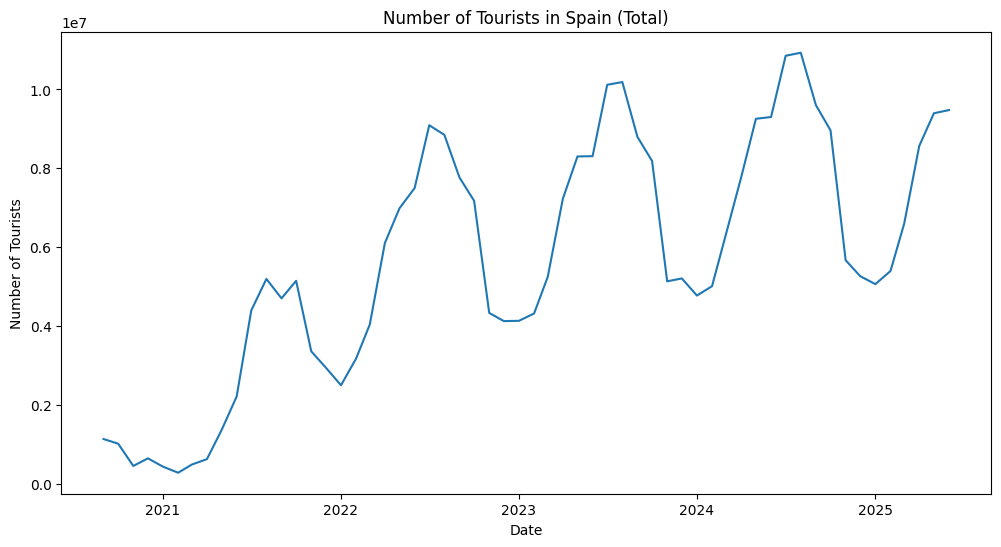

In [5]:
# Data visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=df[df['CCAA']=='Total'], x='Period', y='Total')
plt.title('Number of Tourists in Spain (Total)')
plt.xlabel('Date')
plt.ylabel('Number of Tourists')
plt.show()

It is clear that there is a strong seasonal pattern in the data, and the time series starts just after the pandemic restrictions were lifted. As expected, the high season is summer and the low season is winter.

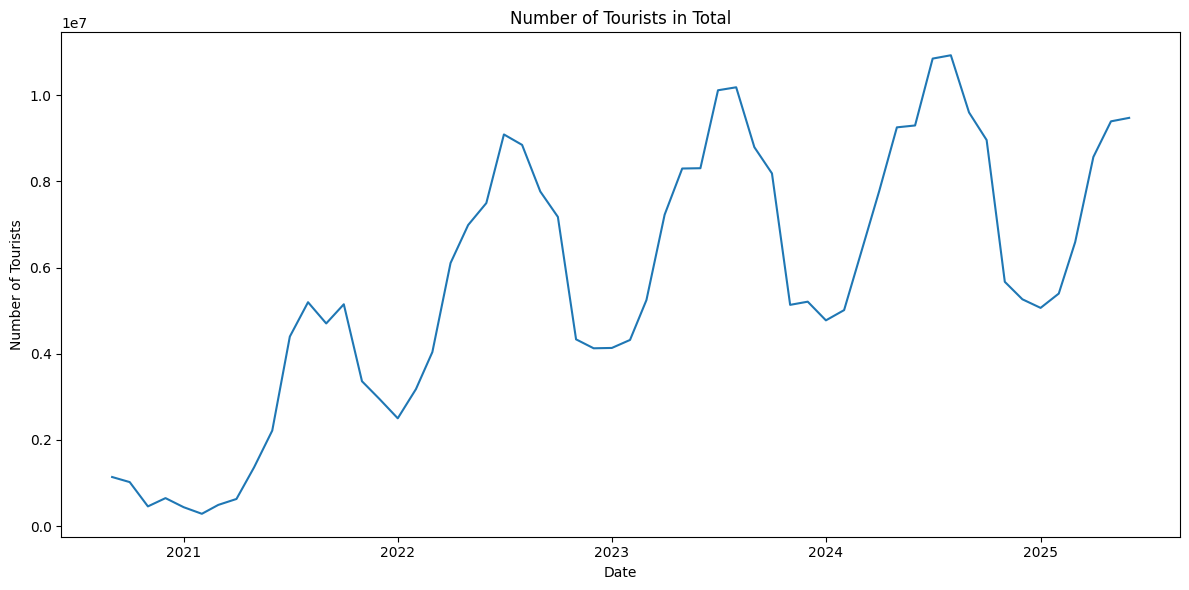

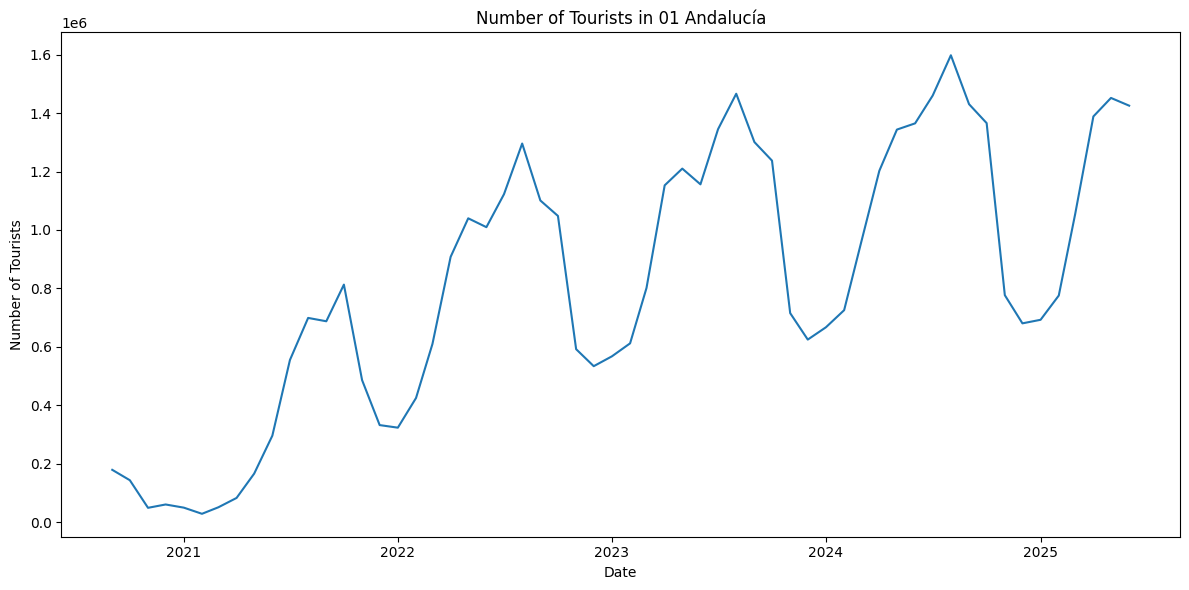

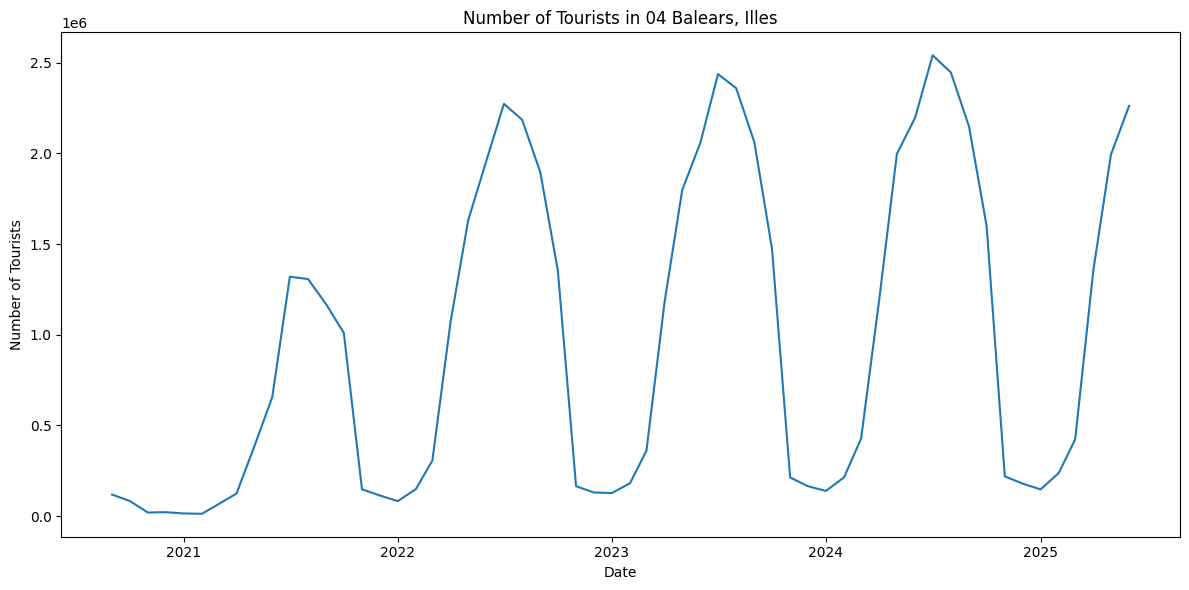

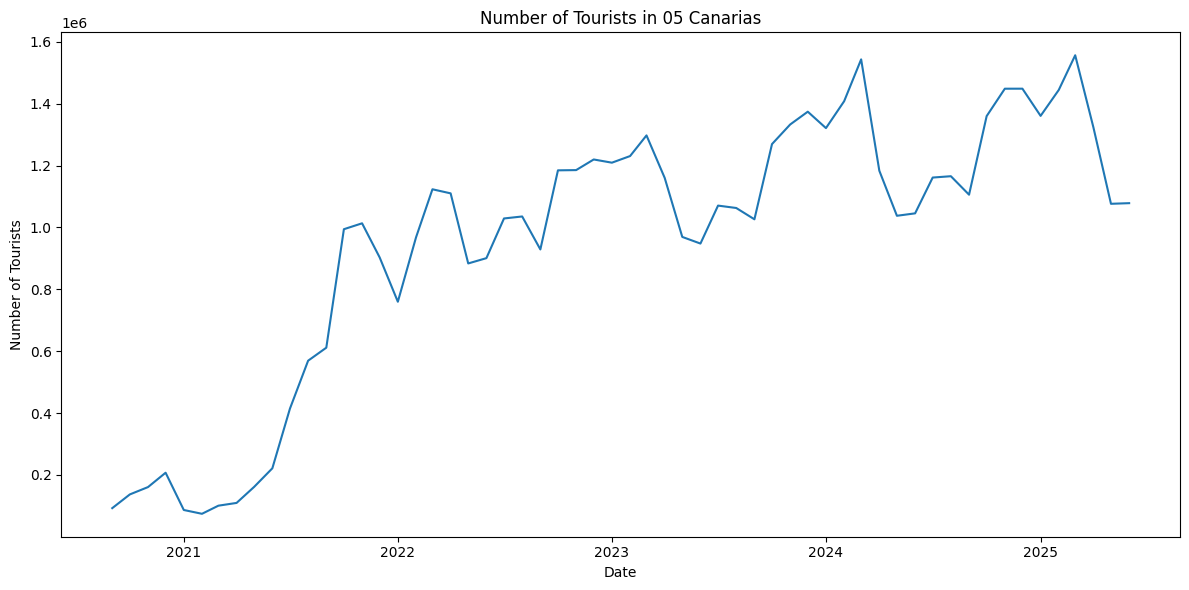

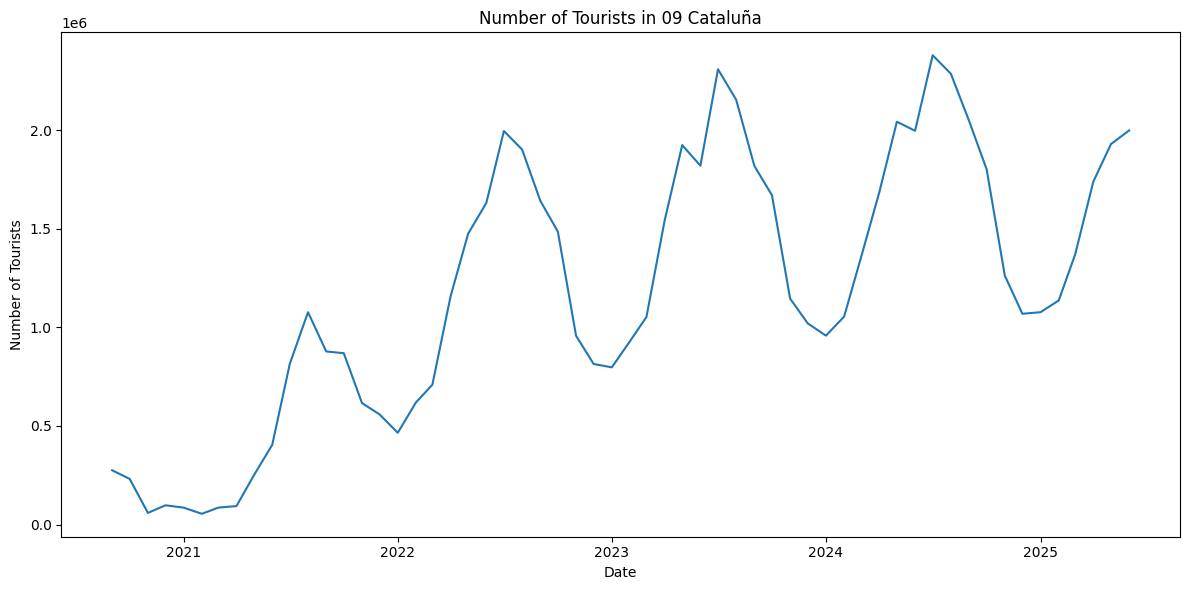

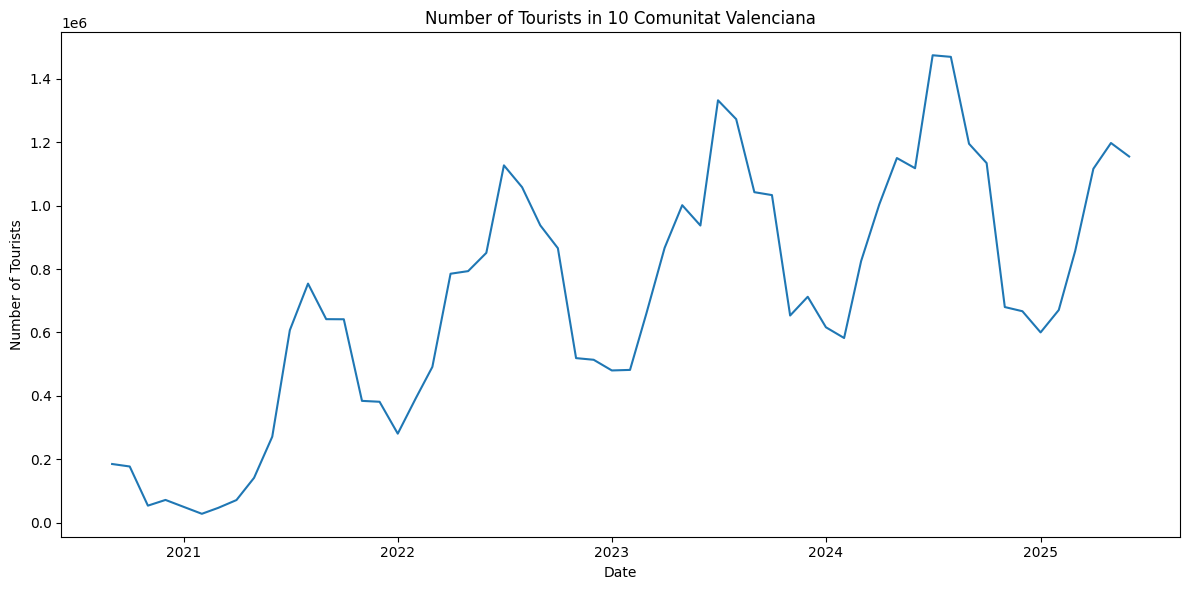

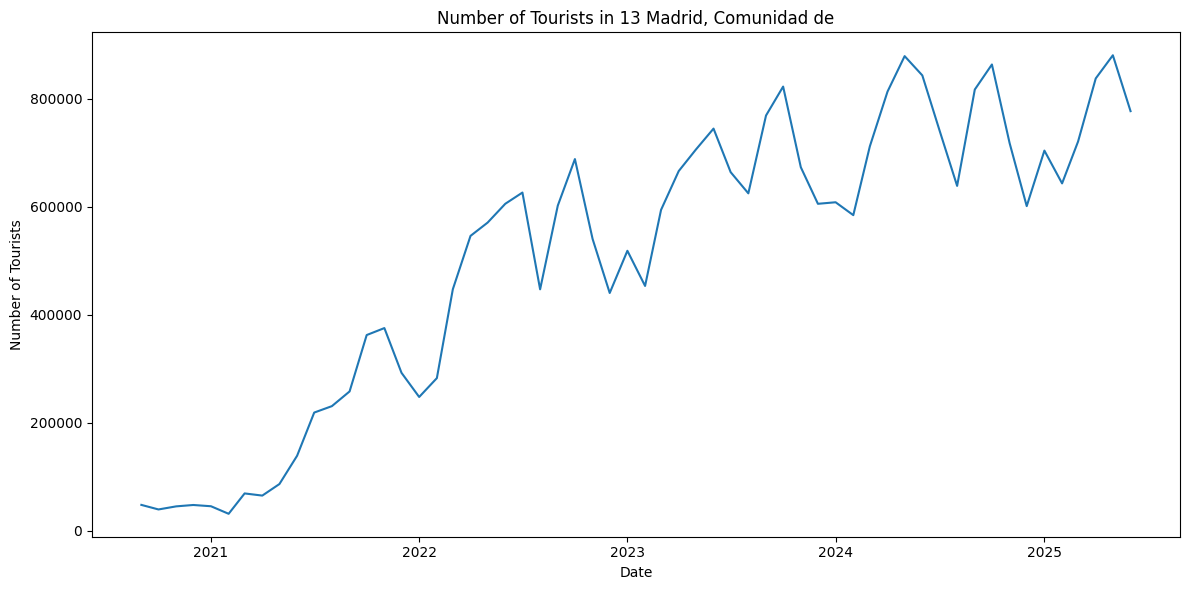

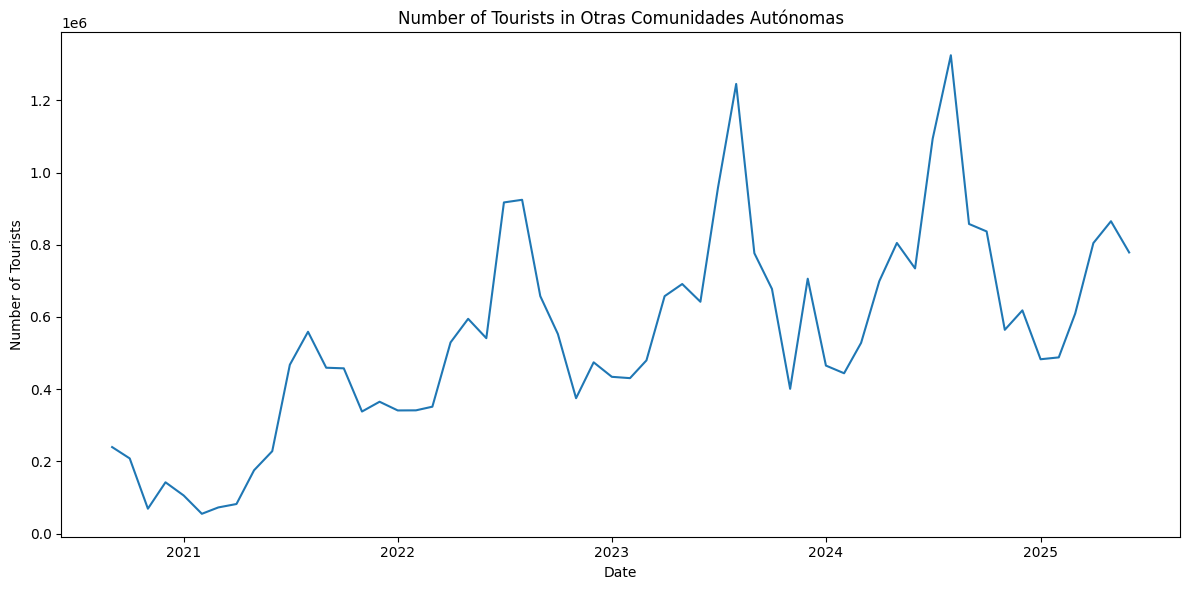

In [6]:
# Plot for each Comunidad Autónoma separately
for comunidad in df['CCAA'].unique():
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=df[df['CCAA'] == comunidad],
        x=df[df['CCAA'] == comunidad].index,
        y='Total'
    )
    plt.title(f'Number of Tourists in {comunidad}')
    plt.xlabel('Date')
    plt.ylabel('Number of Tourists')
    plt.tight_layout()
    plt.show()

Catalonia, Balearic Islands, Andalusia, and Valencia closely follow the national pattern, while Madrid and the Canary Islands show a more stable tourism flow with less pronounced peaks, indicating less dependence on the high season.

Let's plot all the time series together:

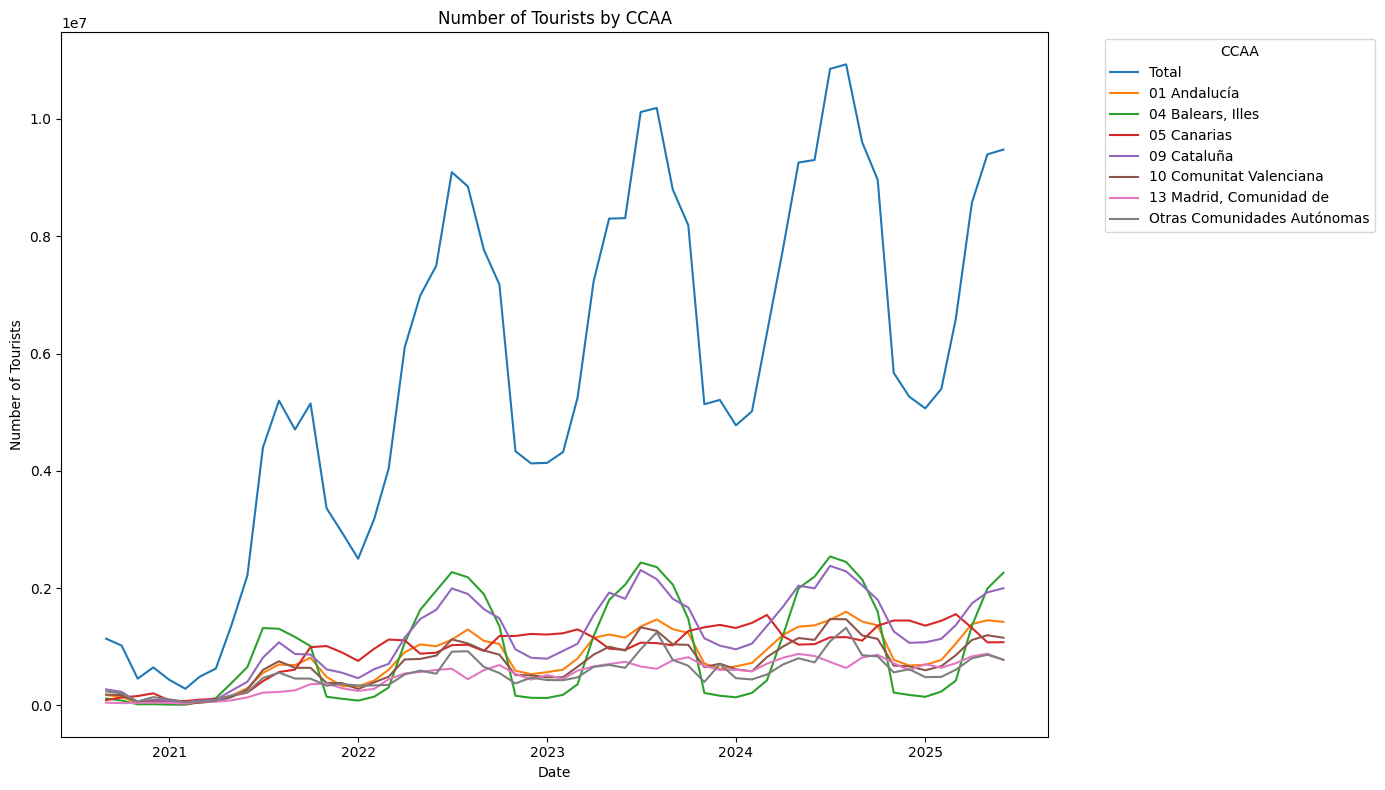

In [7]:
# Plot for all CCAA together
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=df,
    x=df.index,
    y='Total',
    hue='CCAA',
    palette='tab10'
)
plt.title('Number of Tourists by CCAA')
plt.xlabel('Date')
plt.ylabel('Number of Tourists')
plt.legend(title='CCAA', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

We observe that Catalonia and Balearic Islands are the regions most affected by seasonality and resemble the national pattern. It is also evident that Madrid and the Canary Islands have much flatter curves, showing almost no seasonality.

In [8]:
# Sort the DataFrame by date
df = df.sort_index()

# Save the cleaned DataFrame
df.to_csv('../data/processed/frontur_data_ready.csv', index=True, sep=';')

# Final Report

This exploratory data analysis (EDA) of FRONTUR data reveals several key insights:

- There is a strong seasonal pattern in tourist arrivals, with summer as the high season and winter as the low season. The time series begins just after the pandemic restrictions were lifted, which is reflected in the data.
- Catalonia, Balearic Islands, Andalusia, and Valencia closely follow the national pattern, showing pronounced peaks during the high season. In contrast, Madrid and the Canary Islands have a more stable tourism flow, with flatter curves and less dependence on seasonality.
- When visualizing all regions together, it is clear that Catalonia and Balearic Islands are the most affected by seasonality, while Madrid and the Canary Islands stand out for their consistent tourist numbers throughout the year.

Overall, this EDA is no very deep because the dataset was already clean, so the analysis focused on visualizing and interpreting the main patterns. Also, the primary goal was to create a first version for prototyping, rather than conducting an in-depth analysis.